In [6]:
# dados do teste 1 ----- cinco voltas na INOVA (CPH)
# teste 5 voltas: raio 15 metros
# 6 voltas em 187 segundos
# voltas: 28.7, 28.2, 25.71, 25, 24, 24

# dados do teste 2 ----- duas voltas na Reitoria
# teste 2 voltas: raio 7.5 metros
# 2 voltas iguais em 25 segundos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 18}) # Set global font size to 18

GYRO_SCALE_FACTOR = 70 / 1000

dataset_path = "./data/validacao_imu_volta/Segundo teste - Teste cinco voltas"
dataset_path = "./data/validacao_imu_volta/Teceiro Teste -Reitoria"

acelerometro = pd.read_csv(f'{dataset_path}/103_Acelerometro.csv')
giroscopio = pd.read_csv(f'{dataset_path}/104_Giroscopio.csv')

acelerometro['t'] = acelerometro['date'] - acelerometro['date'][0]

giroscopio['t'] = giroscopio['date'] - giroscopio['date'][0]
giroscopio['GiroZ'] = giroscopio['GiroZ'] * GYRO_SCALE_FACTOR
giroscopio

,index,date,GiroX,GiroY,GiroZ,1,2,3,4,5,t
0,0,1762631670193,7,29,24.92,1,1792,0,0,0,0
1,1,1762631670210,46,-161,19.18,1,11776,0,0,0,17
2,2,1762631670226,-25,-16,31.71,1,-6400,0,0,0,33
3,3,1762631670259,-27,-15,31.99,1,-6912,0,0,0,66
4,4,1762631670276,-22,-17,31.99,1,-5632,0,0,0,83
...,...,...,...,...,...,...,...,...,...,...,...
1444,1444,1762631699035,11,14,-1.12,255,2816,0,0,0,28842
1445,1445,1762631699052,7,19,-1.12,255,1792,0,0,0,28859
1446,1446,1762631699086,10,21,-1.05,255,2560,0,0,0,28893
1447,1447,1762631699101,10,25,-1.05,255,2560,0,0,0,28908


30.854215033301617
1.7424390752217134


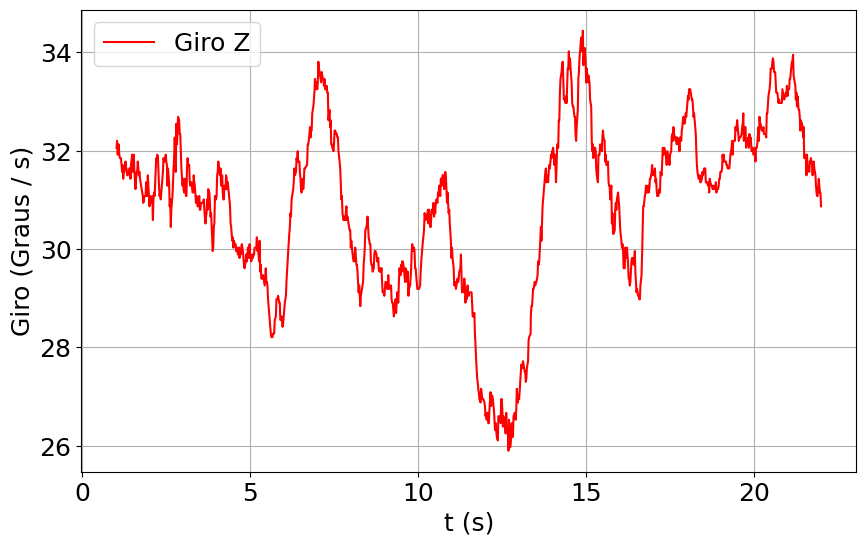

In [8]:
# Create the plot
# filtered_df = giroscopio[(giroscopio['t'] >= 56000) & (giroscopio['t'] <= 82000)]
# filtered_df = giroscopio[(giroscopio['t'] >= 56000) & (giroscopio['t'] <= 175000)]
filtered_df = giroscopio[(giroscopio['t'] >= 1000) & (giroscopio['t'] <= 22000)]
plt.figure(figsize=(10,6))
plt.plot(filtered_df['t'] / 1000, filtered_df['GiroZ'], label="Giro Z", color="red")

print(filtered_df['GiroZ'].mean())
print(filtered_df['GiroZ'].std())

# Add labels and a title
plt.xlabel("t (s)")
plt.ylabel("Giro (Graus / s)")

# Display the plot
plt.grid()
plt.legend()
plt.show()